In [1]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import joblib

In [2]:
IMG_SIZE = 64
data = []
labels = []

dataset_dir = "C:/Users/HP/sign_language_detection/custom_dataset"

print("✅ Loading images from:", dataset_dir)
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if not os.path.isdir(label_dir):
        continue
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        data.append(img)
        labels.append(label)

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
print(f"✅ Loaded {len(data)} images with {len(np.unique(labels))} classes.")

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
num_classes = len(le.classes_)
print("✅ Number of classes:", num_classes)

✅ Loading images from: C:/Users/HP/sign_language_detection/custom_dataset
✅ Loaded 2366 images with 28 classes.
✅ Number of classes: 28


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42)
print(f"✅ Data split: {len(X_train)} train samples, {len(X_test)} test samples")

✅ Data split: 1892 train samples, 474 test samples


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\HP\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=25, batch_size=32)

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.3196 - loss: 2.5629 - val_accuracy: 0.9325 - val_loss: 0.2020
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9761 - loss: 0.0736 - val_accuracy: 0.9937 - val_loss: 0.0353
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9997 - loss: 0.0052 - val_accuracy: 0.9958 - val_loss: 0.0513
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9955 - loss: 0.0171 - val_accuracy: 0.9895 - val_loss: 0.0460
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9982 - loss: 0.0093 - val_accuracy: 0.9916 - val_loss: 0.0297
Epoch 6/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9961 - loss: 0.0097 - val_accuracy: 0.9916 - val_loss: 0.0403
Epoch 7/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9894 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 8/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 1.0000 - loss: 5.3602e-04 - val_accuracy: 0.9979

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
✅ Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        13
           C       1.00      1.00      1.00        14
           D       1.00      1.00      1.00        13
           E       1.00      1.00      1.00        17
           F       1.00      1.00      1.00        16
           G       1.00      1.00      1.00        15
           H       1.00      1.00      1.00        14
       Hello       1.00      1.00      1.00        20
           I       1.00      1.00      1.00        14
           J       1.00      1.00      1.00        19
           K       1.00      1.00      1.00        17
           L       1.00      1.00      1.00        18
           M       1.00      1.00      1.00        15
           N       1.00      1.00      1.00        15
           O       1.00      1.00      1.00        16
           P    

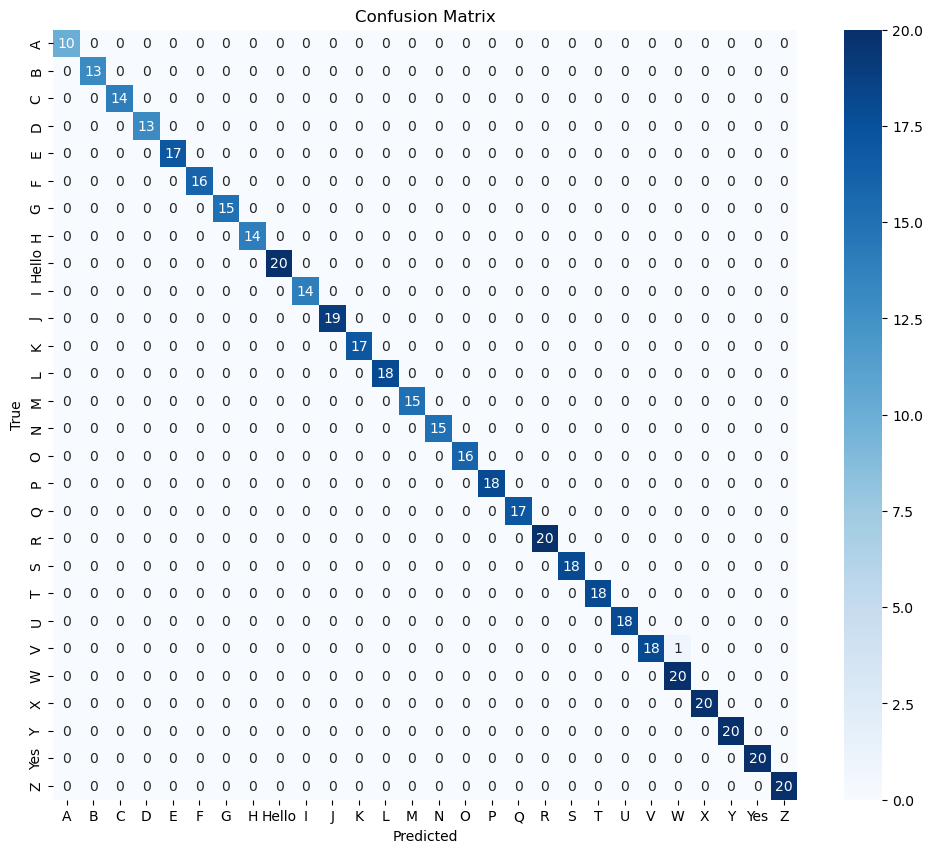

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels on test data
y_pred = np.argmax(model.predict(X_test), axis=1)

# Print classification report
print("✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [7]:
model.save("C:/Users/HP/sign_language_detection/model/sign_model.h5")
joblib.dump(le, "C:/Users/HP/sign_language_detection/model/label_encoder.pkl")
print("✅ Model and label encoder saved successfully!")

✅ Model and label encoder saved successfully!
